# DS 3000 - Assignment 7

**Student Name**: David Yu

**Date**: 2/19/25


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: Predicting Meat Consumption (50 pts)
(0 pts) Load the data directly from the URL. Ensure that you inspect the data, so that you know how to identify the necessary columns.
Note: this is an alternate link that can be used to load the data: https://drive.google.com/uc?id=1mEewmIvXA57H3upxkqx9vkZfKch9oDsL

In [1]:
import pandas as pd

df = pd.read_csv('DP_LIVE_26102023160103370.csv')

## Question 2: 
(10 pts) Extract the meat consumption data for any three countries of your choice and evaluate the patterns and trends in their meat consumption. You can explore any (2) types of meat (from the chosen countries), and you should only select one unit of measurement**. Ensure that you visualize the data and explain your findings.


In [5]:
import matplotlib.pyplot as plt

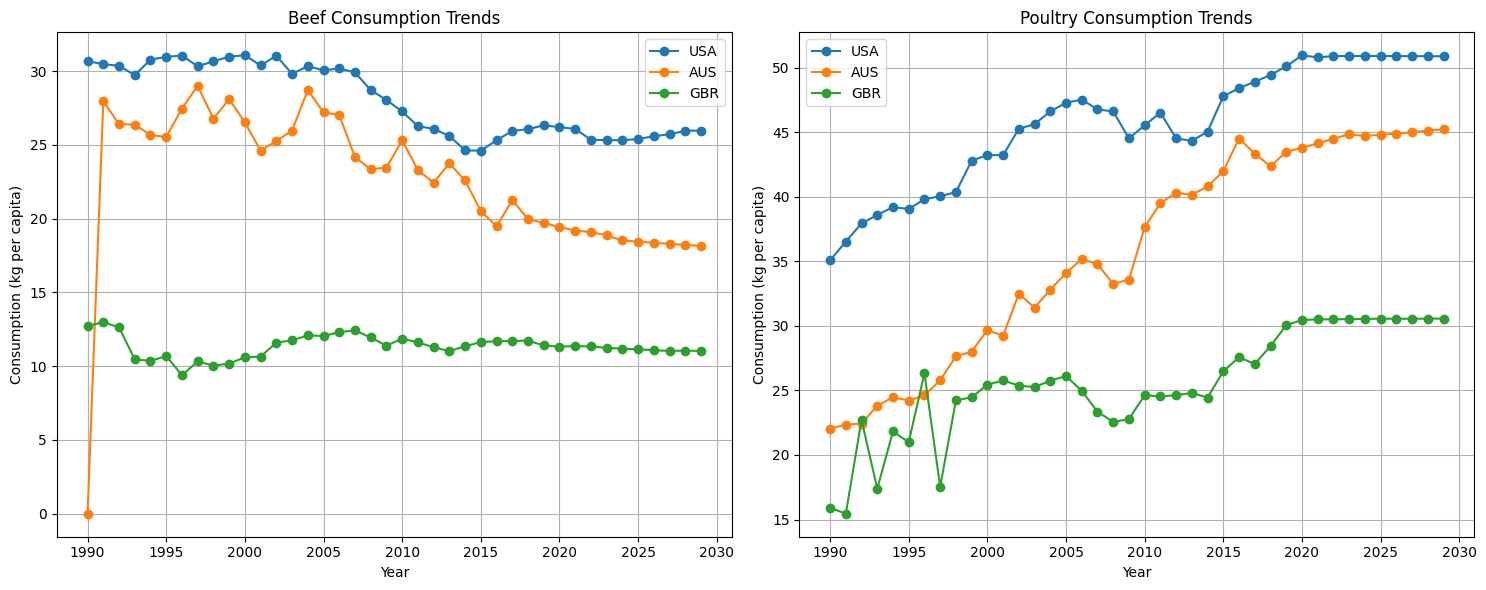

In [6]:
selected_countries = ['USA', 'AUS', 'GBR']
selected_meats = ['BEEF', 'POULTRY']
filtered_df = df[
    (df['LOCATION'].isin(selected_countries)) & 
    (df['SUBJECT'].isin(selected_meats)) &
    (df['MEASURE'] == 'KG_CAP')
]

plt.figure(figsize=(15, 6))

# Beef Plot
plt.subplot(1, 2, 1)
for country in selected_countries:
    beef_data = filtered_df[
        (filtered_df['LOCATION'] == country) & 
        (filtered_df['SUBJECT'] == 'BEEF')
    ]
    plt.plot(beef_data['TIME'], beef_data['Value'], marker='o', label=country)

plt.title('Beef Consumption Trends')
plt.xlabel('Year')
plt.ylabel('Consumption (kg per capita)')
plt.legend()
plt.grid(True)

# Poultry Plot
plt.subplot(1, 2, 2)
for country in selected_countries:
    poultry_data = filtered_df[
        (filtered_df['LOCATION'] == country) & 
        (filtered_df['SUBJECT'] == 'POULTRY')
    ]
    plt.plot(poultry_data['TIME'], poultry_data['Value'], marker='o', label=country)

plt.title('Poultry Consumption Trends')
plt.xlabel('Year')
plt.ylabel('Consumption (kg per capita)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Patterns and Trends Noticed:
- USA has the highest beef consumption, followed by Australia. Great Britain shows significantly less beef consumption compared to the other 2 countries.
- USA and Australia both show a steady decline in beef consumption as time passes. At the same time, poultry consumption increases as time passes for USA and Australia.
- The consumption gaps between all three countries is the smallest for poultry consumption.
- By the time 2030 comes, the graphes seem to show a steady consumption of both poultry and beef.

## Question 3: 
(5 pts) Extract the poultry consumption data, from 1994 to 2014 (inclusive), for Mexico, that is measured in thousand tonnes of carcass weight**. Note: the filtered dataframe should only contain the time and the values.


In [10]:
mexico_poultry = df[
    (df['LOCATION'] == 'MEX') & 
    (df['SUBJECT'] == 'POULTRY') & 
    (df['TIME'].between(1994, 2014)) & 
    (df['MEASURE'] == 'THND_TONNE')
][['TIME', 'Value']]

mexico_poultry['Value'] = mexico_poultry['Value'].round(2)

print("Poultry Consumption for Mexico (1994-2014):")
print(mexico_poultry)

Poultry Consumption for Mexico (1994-2014):
      TIME    Value
9644  1994  1369.91
9645  1995  1515.52
9646  1996  1505.32
9647  1997  1750.50
9648  1998  1931.27
9649  1999  2080.25
9650  2000  2229.97
9651  2001  2351.66
9652  2002  2516.81
9653  2003  2686.01
9654  2004  2783.34
9655  2005  3029.62
9656  2006  3112.79
9657  2007  3167.94
9658  2008  3261.93
9659  2009  3314.59
9660  2010  3421.16
9661  2011  3532.20
9662  2012  3612.90
9663  2013  3690.32
9664  2014  3801.83


## Question 4: 
(5 pts) Summarize the extracted data using descriptive statistics. Explain the statistical summary.
NOTE: this question requires that you evaluate and explain the distribution. Do not simply display the descriptive statistics or say "the maximum values are higher than the average".

In [13]:
stats = mexico_poultry['Value'].describe().round(2)
print("\nDescriptive Statistics:")
print(stats)


Descriptive Statistics:
count      21.00
mean     2698.37
std       783.94
min      1369.91
25%      2080.25
50%      2783.34
75%      3314.59
max      3801.83
Name: Value, dtype: float64


- With a mean of 2698.37 and a median of 2783.34, the distribution is left skewed since the median is greater than the mean. 
- The standard deviation of 783.94 shows that the distribution varies a lot. This is pretty accurate as we can see there is a lot of significant changes in consumption over time.
- The range spans from 1369.91 to 3801.83 shows that there is a huge increase in consumption over the time frame.

Overall, these descriptive statistics show a consistent and long term increase in poultry consumption in Mexico.

## Question 5: 
(10 pts) Visualize the extracted data, using a line chart, and comment on the trend.

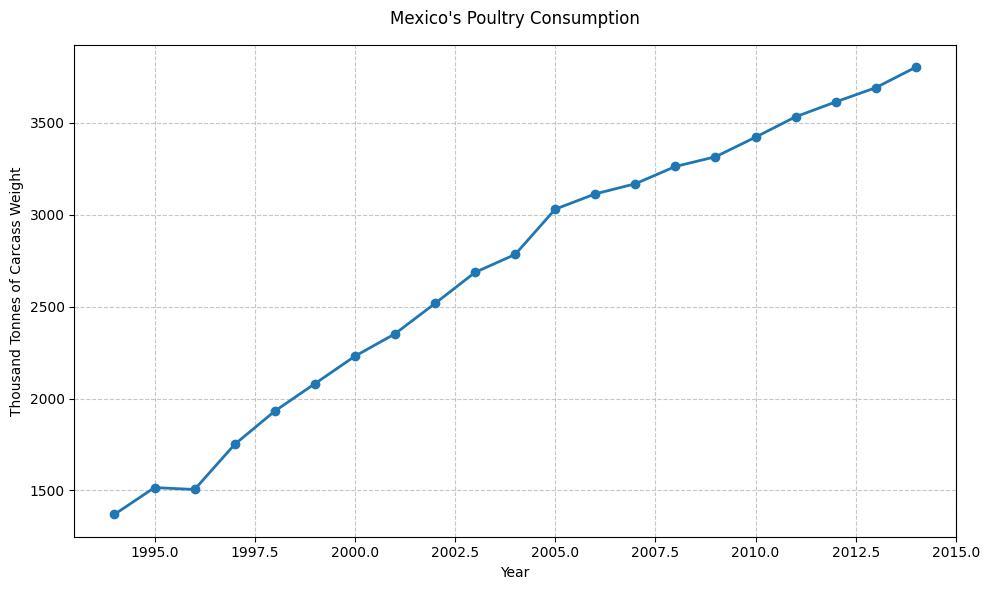

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(mexico_poultry['TIME'], mexico_poultry['Value'], marker='o', linewidth=2)

plt.title('Mexico\'s Poultry Consumption', fontsize=12, pad=15)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Thousand Tonnes of Carcass Weight', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.grid(True)

plt.tight_layout()

plt.show()

This line chart shows a consistent strong positive linear growth in Mexico's poultry consumption. The growth appears to be relatively steady, suggesting systematic rather than erratic increases. The slope remains relatively positive all throughout the chart, as there is no significant plateus or drops in consumption.

## Question 6:
(15 pts) Predict poultry consumption from 2015 to 2020 using a simple linear regression model.
- Ensure that you visualize the original dataset along with the model's predictions.
- Evaluate the model's predictions against the actual consumption data from 2015 to 2020 and discuss its performance.

In [20]:
import numpy as np

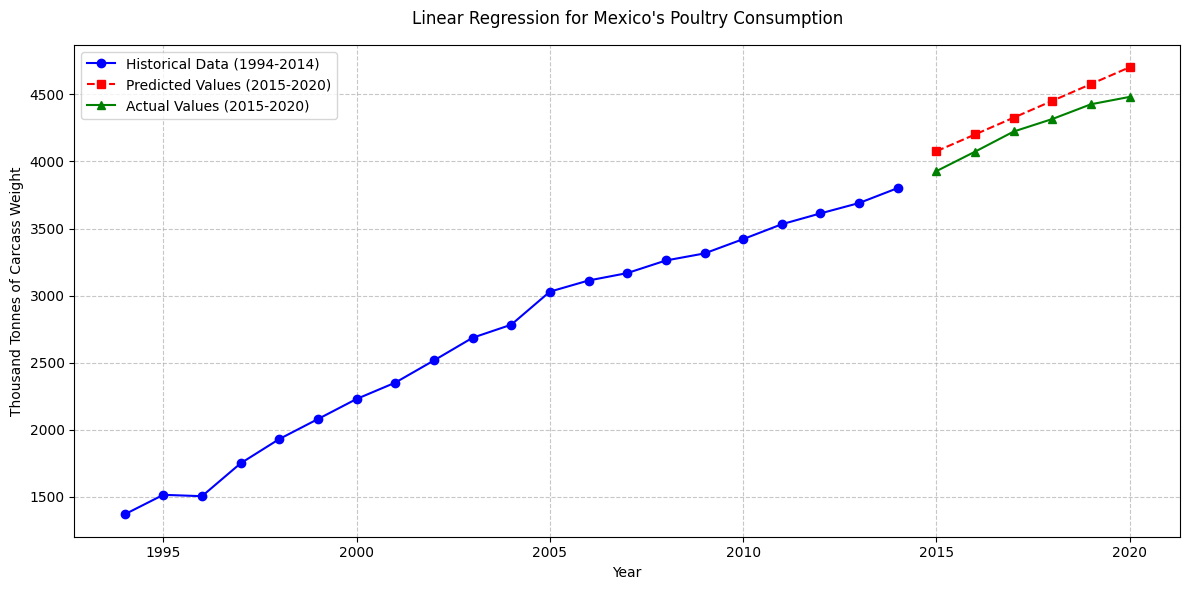

In [24]:
X = mexico_poultry['TIME'].values
y = mexico_poultry['Value'].values

# Slope and intercept
n = len(X)
m = (n * np.sum(X * y) - np.sum(X) * np.sum(y)) / (n * np.sum(X**2) - np.sum(X)**2)
b = (np.sum(y) - m * np.sum(X)) / n

# Prediction with slope and intercept
future_years = np.array(range(2015, 2021))
predictions = m * future_years + b
predictions = np.round(predictions, 2)

actual_data = df[
    (df['LOCATION'] == 'MEX') &
    (df['SUBJECT'] == 'POULTRY') &
    (df['TIME'].between(2015, 2020)) &
    (df['MEASURE'] == 'THND_TONNE')
][['TIME', 'Value']]
actual_data['Value'] = actual_data['Value'].round(2)

plt.figure(figsize=(12, 6))
plt.plot(X, y, marker='o', label='Historical Data (1994-2014)', color='blue')

# Predictions
plt.plot(future_years, predictions, marker='s', 
         label='Predicted Values (2015-2020)', color='red', linestyle='--')

# Actual
plt.plot(actual_data['TIME'], actual_data['Value'], 
         marker='^', label='Actual Values (2015-2020)', color='green')

plt.title('Linear Regression for Mexico\'s Poultry Consumption', fontsize=12, pad=15)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Thousand Tonnes of Carcass Weight', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

The model overestimates the actual consumption values from 2015 to 2020. The predicted growth and the actual growth are both positive linear growth, but the actual grows at a slower rate than the predicted. Overall, the linear regression model does a solid job of showing the overall upward trend in poultry consumption. It provides a reasonable approximation and it maintains the general direction of growth. However, it is limited in accounting for potential factors that may affect growth. The linear regression model assumes a constant growth rate when there are various outside factors like market changes or economic conditions that may affect the growth of poultry consumption.

## Question 7:
(5 pts) Calculate the R-squared and explain what this tells you about the model.

In [30]:
y_actual = actual_data['Value'].values
y_mean = np.mean(y_actual)

tss = np.sum((y_actual - y_mean)**2)

rss = np.sum((y_actual - predictions)**2)

r_squared = 1 - (rss/tss)
r_squared = r_squared.round(2)
print(f"R-squared: {r_squared}")

R-squared: 0.38


An r-squared value of 0.38 tells us that the model explains only about 38% of the variance in the actual consumption data. This means around 62% of the variance in actual consumption is unexplained by our linear model. This is a relatively low r-squared value, and it tells us that while our model captured the general upward trend in poultyr consumption, it failed to account for other important patterns in the actual data. 

## Question 8: 
(5 pts)[optional/bonus] This is a challenge question that may require some research.
residuals: Visualize the residuals of the regression model in question 6 and explain the chart.
Note: A residual is the difference between the actual and predicted values.

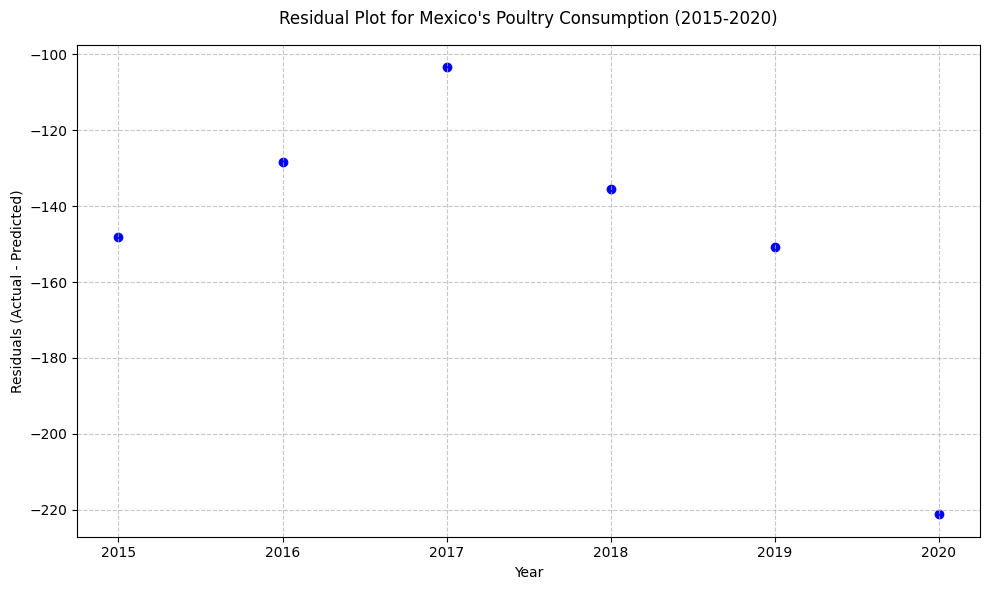

In [35]:
residuals = actual_data['Value'].values - predictions

plt.figure(figsize=(10, 6))

plt.scatter(actual_data['TIME'], residuals, color='blue', marker='o')

plt.title('Residual Plot for Mexico\'s Poultry Consumption (2015-2020)', fontsize=12, pad=15)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

The residual plot shows that all the residuals are negative. This means that our model consistently overestimated the actual consumption. The residuals also show a non-random pattern with an upside down V pattern. This means the linear model may not be the best choice for this data.

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
